## M046_2024_12_18_16_00

In [10]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal


from tools.dsp.preprocessing import preprocess
from tools.viz.rasters import plot_heatmap_raster
from tools.viz.dimensionality import plot_VAF
from tools.params import Params, colors
# from tools.dimensionality.utils import participation_ratio, pca_pr


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# TODO: add example data to the repo and run on that
data_dir = "/data/bnd-data/raw/M046/M046_2024_12_18_16_00"
fname0 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_1.mat")

In [5]:
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.


In [ ]:
for region in ["MOp", "SSp_ll", "CP", "Thal"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 319
Neurons in SSp_ll: 167
Neurons in CP: 509
Neurons in Thal: 232


In [6]:
for region in ["MOp", "SSp_ll", "CP", "Thal"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 322
Neurons in SSp_ll: 172
Neurons in CP: 501
Neurons in Thal: 223


In [7]:
df_ = preprocess(df, only_trials=False)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: motion_sensor_xy might be a time-varying field. It matches the length of Thal_spikes on 99.87562189054727% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyalda

Combined every 3 bins
Resulting Thal_spikes ephys data shape is (NxT): (202, 10000)
Resulting SSp_ll_spikes ephys data shape is (NxT): (105, 10000)
Resulting all_spikes ephys data shape is (NxT): (12, 10000)
Resulting MOp_spikes ephys data shape is (NxT): (182, 10000)
Resulting CP_spikes ephys data shape is (NxT): (252, 10000)


# Example plots

200


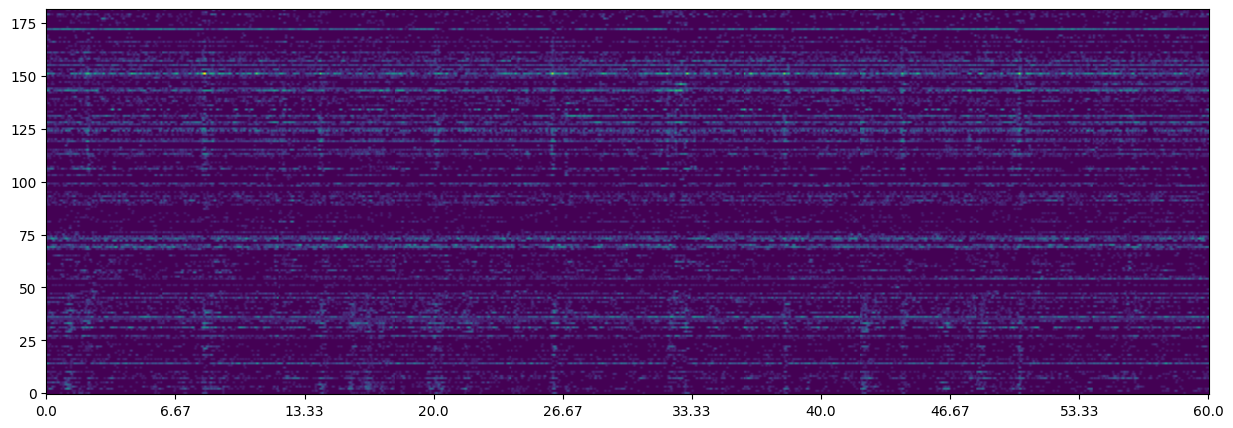

200


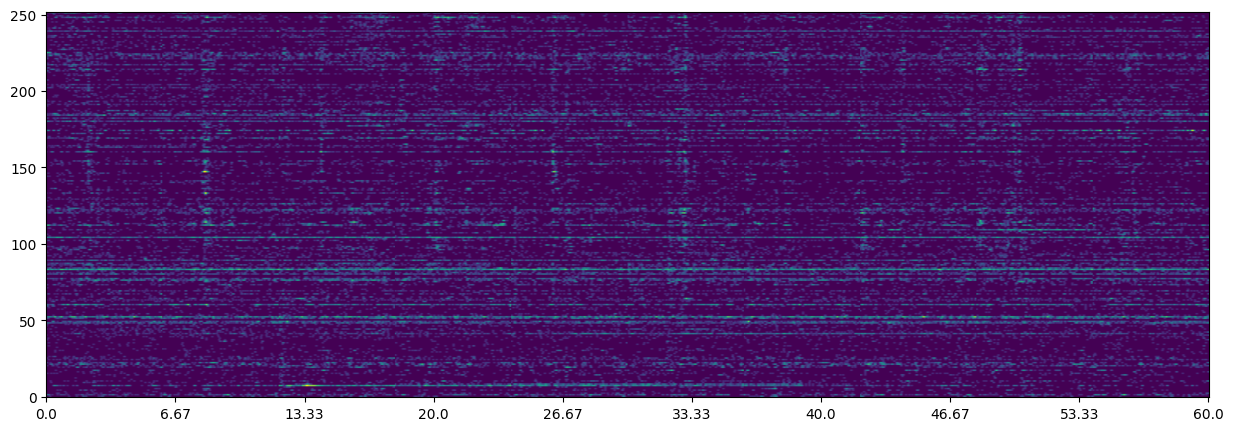

200


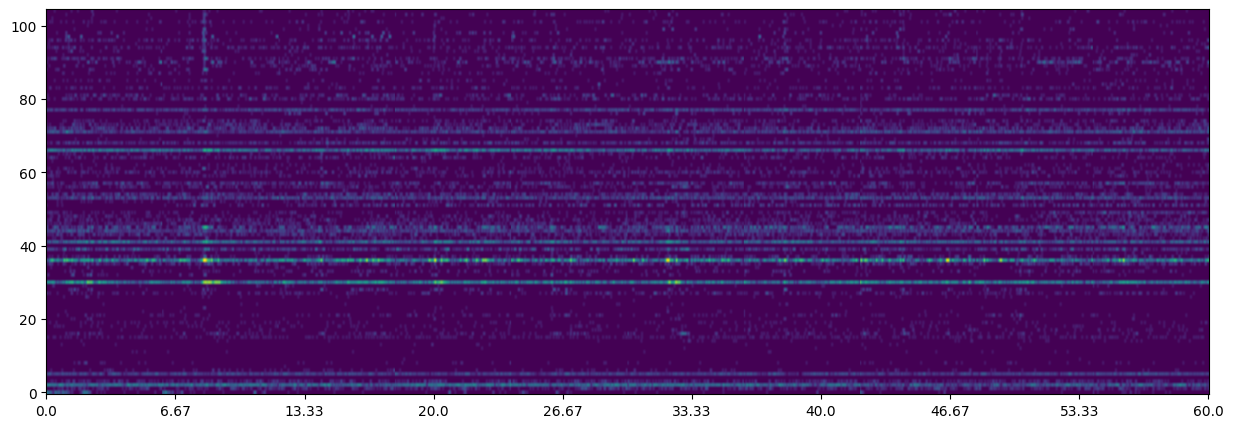

200


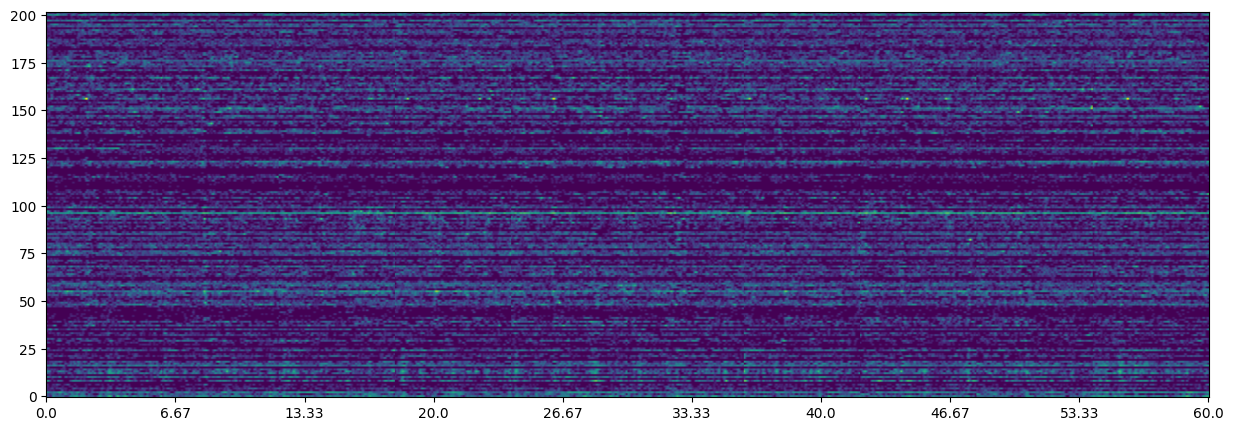

In [33]:

# axes.imshow(rates.T, aspect="auto")
areas = ["MOp", "CP", "SSp_ll", "Thal"]
for area in areas:
    fig, axes = plt.subplots(1, figsize=(15, 5), sharey=True)
    plot_heatmap_raster(pyal.select_trials(df_, df_.trial_name == 'trial')[50:60], area=area,ax=axes, show=False, add_sol_onset=False)
    plt.show()

# rates.shape

200


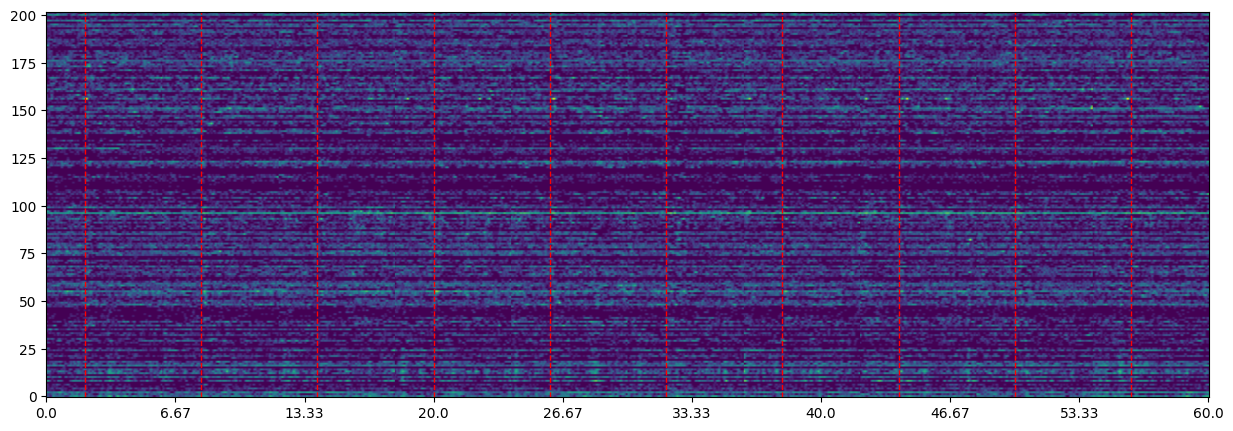

In [27]:
fig, axes = plt.subplots(1, figsize=(15, 5), sharey=True)

# axes.imshow(rates.T, aspect="auto")
area="Thal"
plot_heatmap_raster(pyal.select_trials(df_, df_.trial_name == 'trial')[50:60], area=area,ax=axes, show=False, add_sol_onset=True)
plt.show()

# rates.shape

# Latents

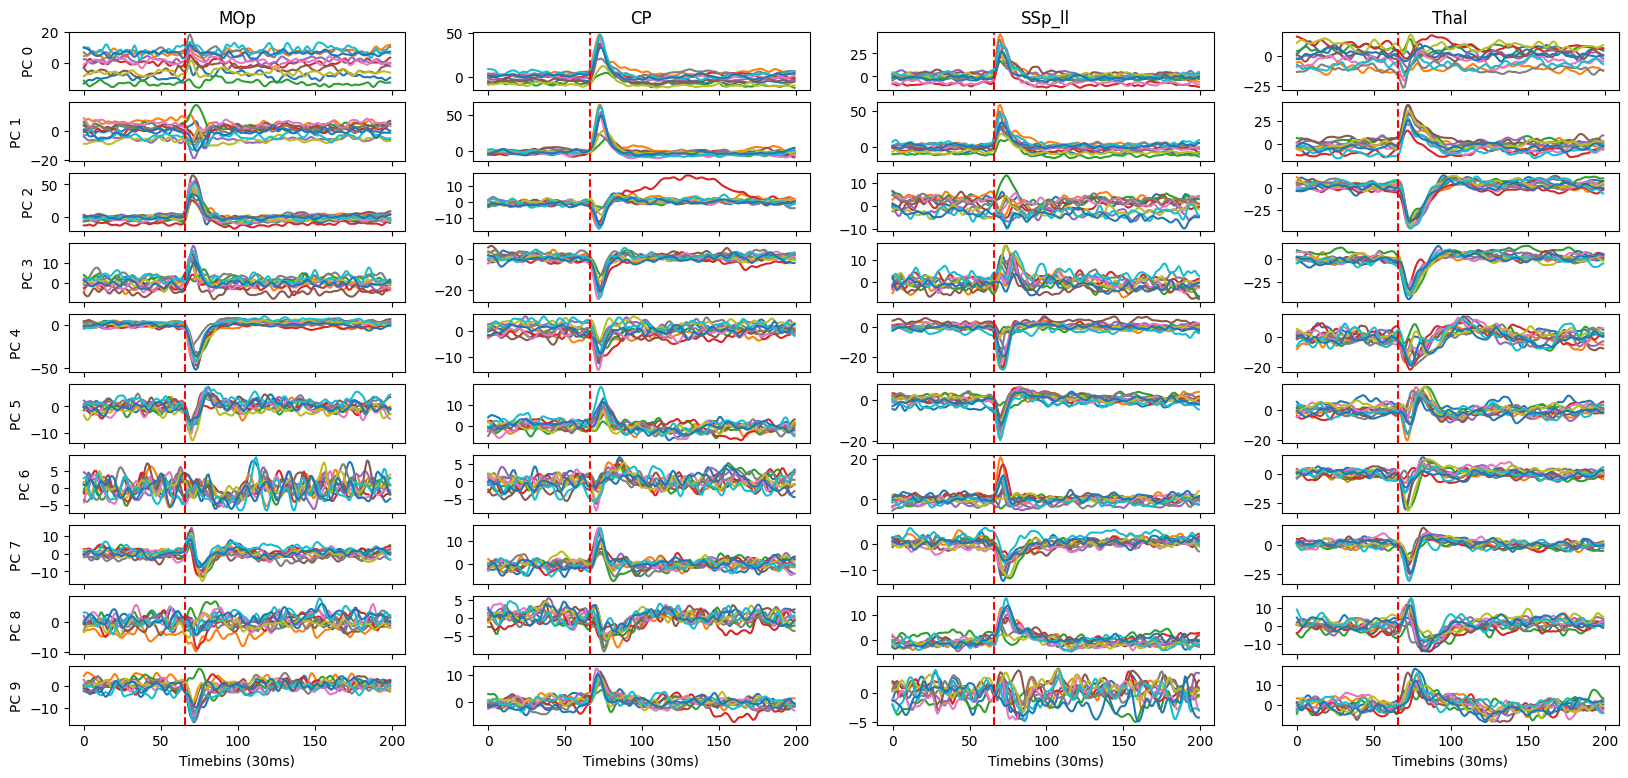

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

areas = ["MOp", "CP", "SSp_ll", "Thal"]
dfs = []
axes = []
category = "values_Sol_direction"
trial_types = ['trial']
epoch = None
n_components = 10

df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

df_int = df_trials_motion[:-1]

timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
targets = np.unique(df_trials_motion[category])


fig, axes = plt.subplots(n_components, n_cols, figsize=(20, 9), sharex='all')
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# ex = pyal.get_sig_by_trial(df_trials_motion, '_pca')
# ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
# axes[-1, 0].plot()

# plt.tight_layout()
plt.show()